In [ ]:

import pandas as pd
dataset_path = '/content/survey_lung_cancer.csv'
data = pd.read_csv(dataset_path)
print("Dataset successfully loaded!")
print(data.head())


Dataset successfully loaded!
   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0    MALE   69        0               1        1              0   
1    MALE   74        1               0        0              0   
2  FEMALE   59        0               0        0              1   
3    MALE   63        1               1        1              0   
4  FEMALE   63        0               1        0              0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0         1         0         1                  1         1   
1                1         1         1         0                  0         0   
2                0         1         0         1                  0         1   
3                0         0         0         0                  1         0   
4                0         0         0         1                  0         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0        

### Step 1: Data Cleaning & Preprocessing

**Objective:** Prepare the dataset for modeling by removing duplicates, checking missing values, inspecting schema/statistics, and encoding categorical variables for ML compatibility.

**What we do**
- **Inspect dataset size** and **identify duplicate rows**.
- **Remove duplicates** to avoid data leakage and inflated metrics.
- **Check for missing values** to understand data quality.
- **Review schema (`.info`) and summary stats (`.describe`)** to spot types, ranges, and potential issues.
- **Encode categorical features** (e.g., `GENDER`, `LUNG_CANCER`) using `LabelEncoder` so models can consume them.
- **Standardize binary responses** (e.g., YES/NO) to numeric codes for consistency.
- **Preview the preprocessed data** to confirm transformations.

**Why it matters**
- Clean, well-encoded data reduces noise and ensures models learn meaningful patterns.
- Early checks help prevent downstream errors during training and evaluation.

**Key outputs to note**
- Original vs. post-dedup **row counts**
- **Null-value summary** per column
- Encoded values for `GENDER` and `LUNG_CANCER`
- **Head of the processed dataframe** (quick sanity check)


In [ ]:
from sklearn.preprocessing import LabelEncoder


print("Dataset Shape:", data.shape)
print("\nNumber of Duplicate Rows:", data.duplicated().sum())


data = data.drop_duplicates()
print("Dataset Shape after removing duplicates:", data.shape)


print("\nNumber of Null Values per Column:\n", data.isnull().sum())


print("\nDataset Information:")
print(data.info())
print("\nDataset Description:")
print(data.describe())

label_encoder = LabelEncoder()

if 'GENDER' in data.columns:
    data['GENDER'] = label_encoder.fit_transform(data['GENDER'])
    print("\nUnique values in GENDER column after encoding:", data['GENDER'].unique())

if 'LUNG_CANCER' in data.columns:
    data['LUNG_CANCER'] = label_encoder.fit_transform(data['LUNG_CANCER'])
    print("\nUnique values in LUNG_CANCER column after encoding:", data['LUNG_CANCER'].unique())


data.replace({'YES': 2, 'NO': 1}, inplace=True)

print("\nPreprocessed Dataset Preview:")
print(data.head())


Dataset Shape: (309, 16)

Number of Duplicate Rows: 33
Dataset Shape after removing duplicates: (276, 16)

Number of Null Values per Column:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-

### Step 2: Exploratory Data Analysis (EDA)

**Objective:** Explore the dataset to better understand the distribution of the target variable (`LUNG_CANCER`) and how different features relate to it.

**What we do**
- Inspect the **target variable distribution** to check for class imbalance.
- Visualize **feature-target relationships** (e.g., Smoking, Gender, Age, Symptoms).
- Compute and visualize a **correlation heatmap** to detect strongly/weakly related features.

**Why it matters**
- Understanding class balance is crucial (imbalanced datasets can bias models).
- Feature-target plots help reveal which attributes may be useful predictors.
- Correlation analysis provides an early sense of redundancy or irrelevant variables.

**Key outputs to note**
- **Class distribution plot** (Yes vs. No for lung cancer).
- Feature-wise stacked bar plots showing proportions of lung cancer cases.
- **Correlation heatmap** with highlights of strong vs. weak relationships.


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int64
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            2

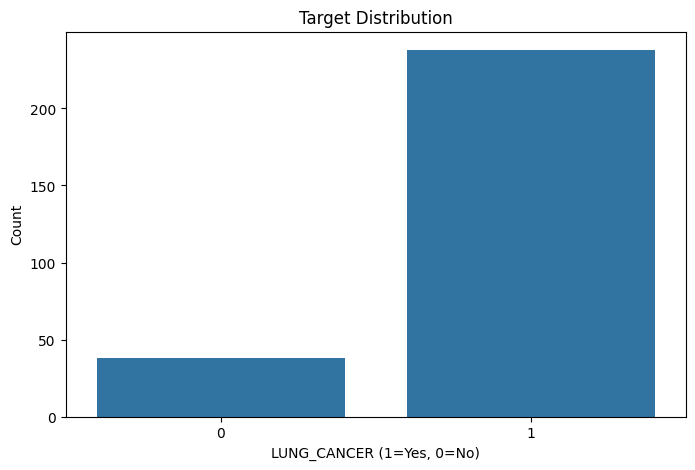


Value Counts of Target Variable (LUNG_CANCER):
LUNG_CANCER
1    238
0     38
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Dataset Information:")
print(data.info())

# 2. Visualize the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='LUNG_CANCER', data=data)
plt.title('Target Distribution')
plt.xlabel('LUNG_CANCER (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

# 3. Display value counts of the target variable
print("\nValue Counts of Target Variable (LUNG_CANCER):")
print(data['LUNG_CANCER'].value_counts())


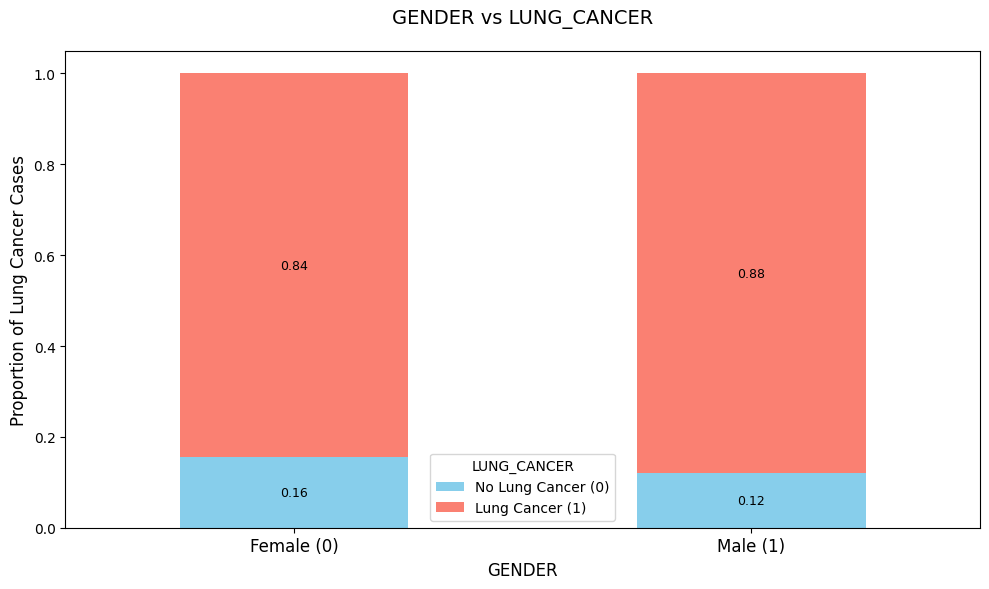

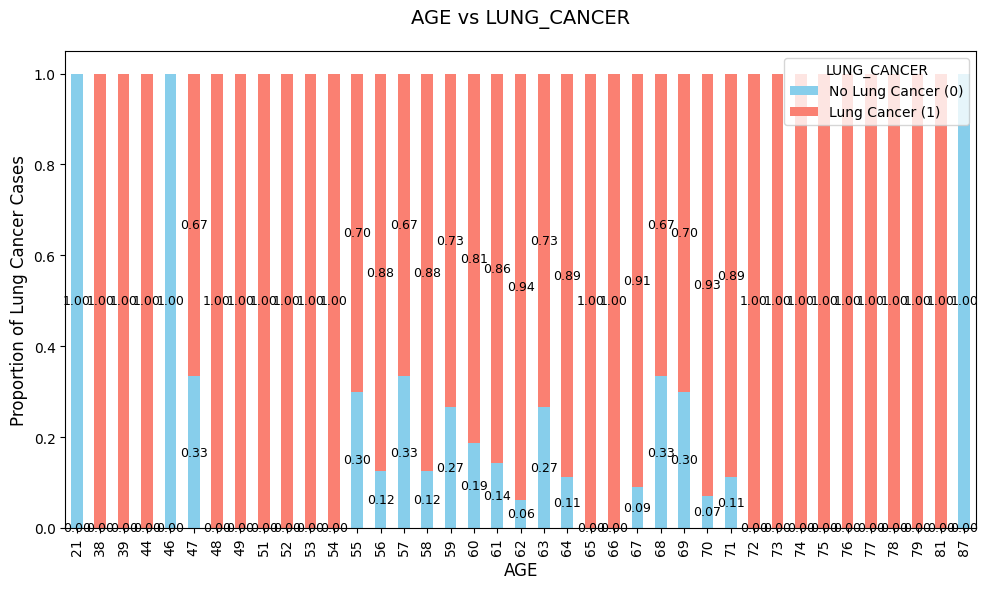

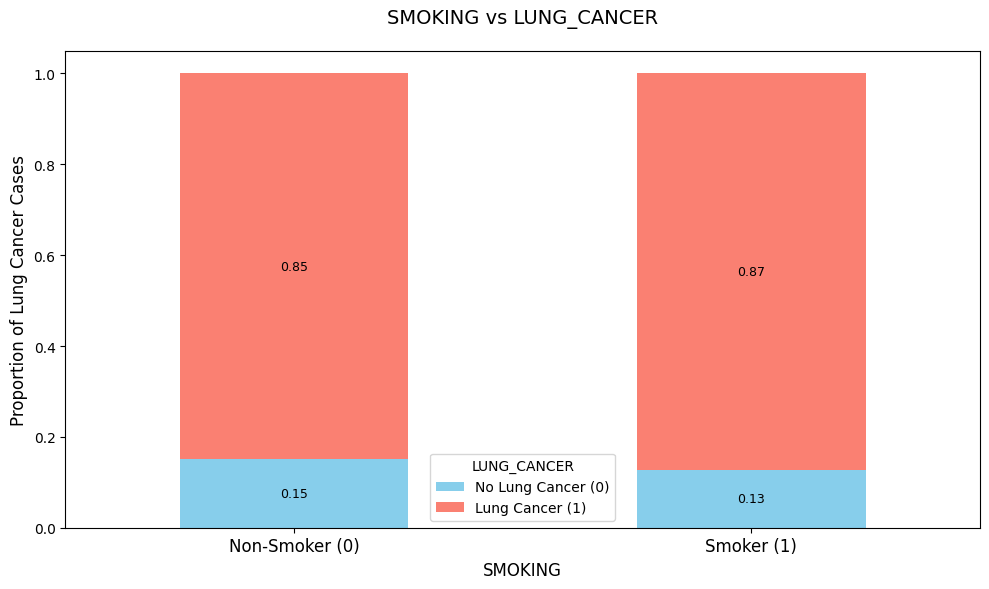

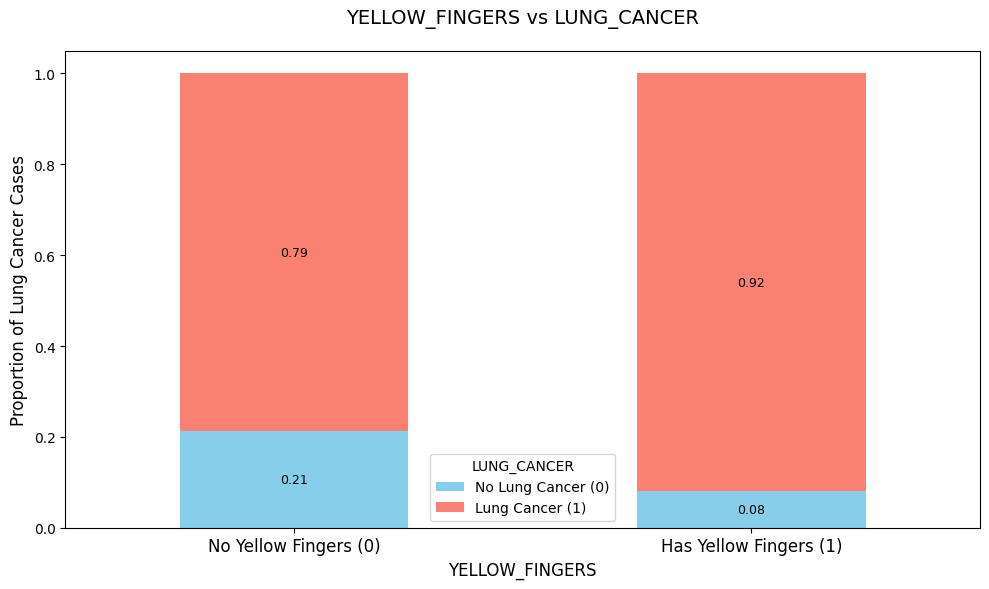

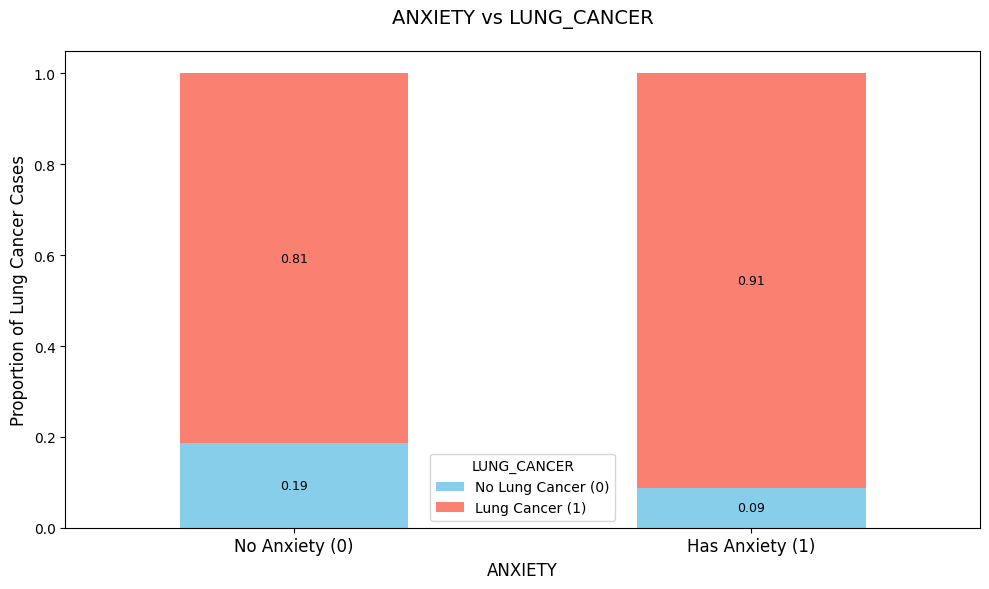

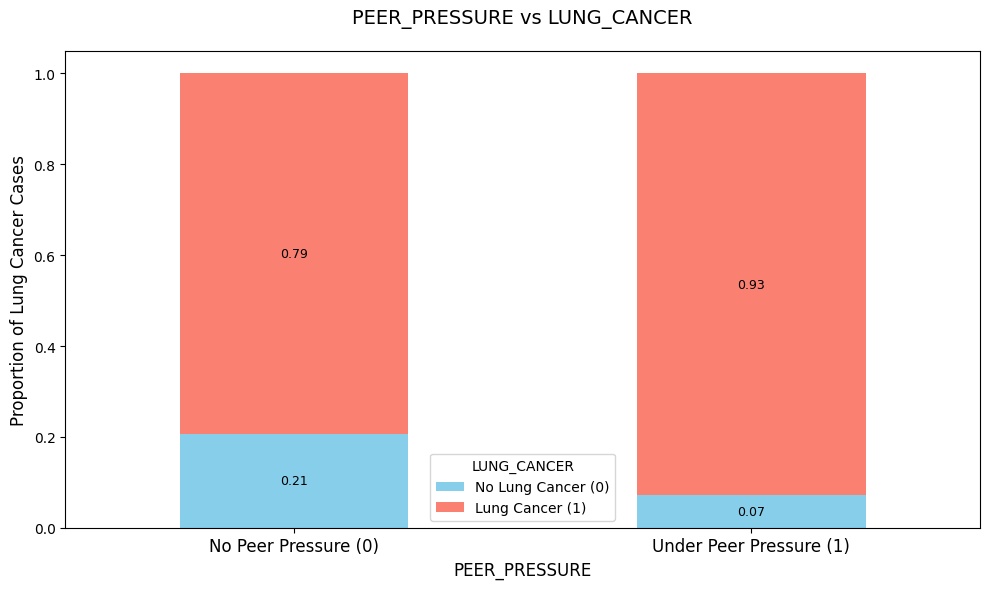

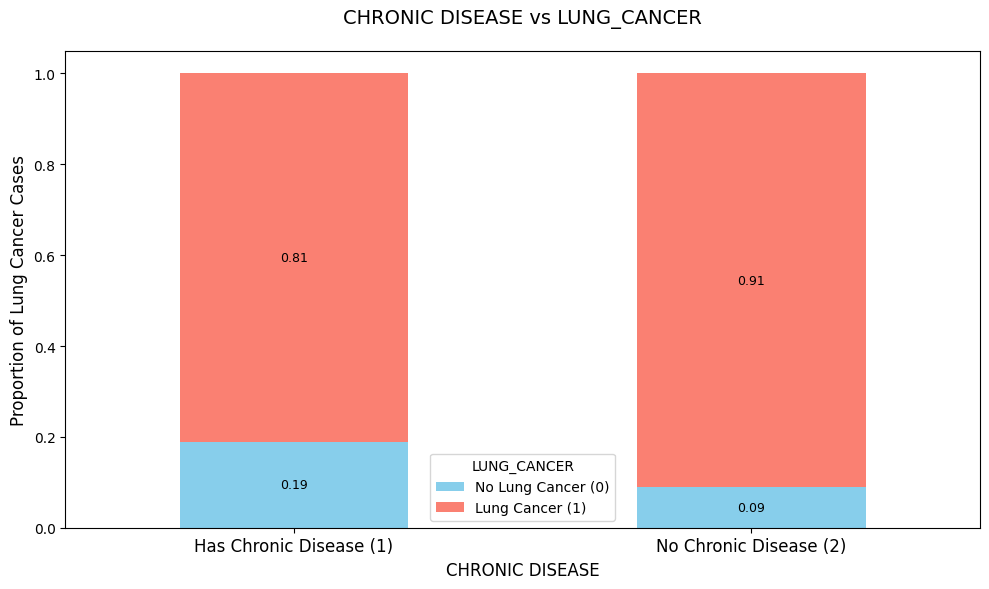

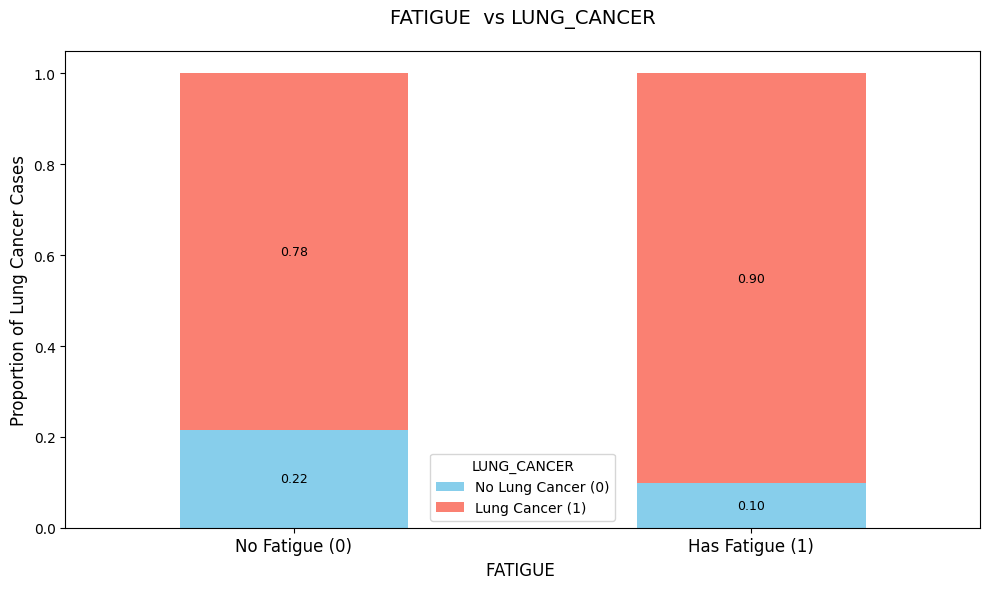

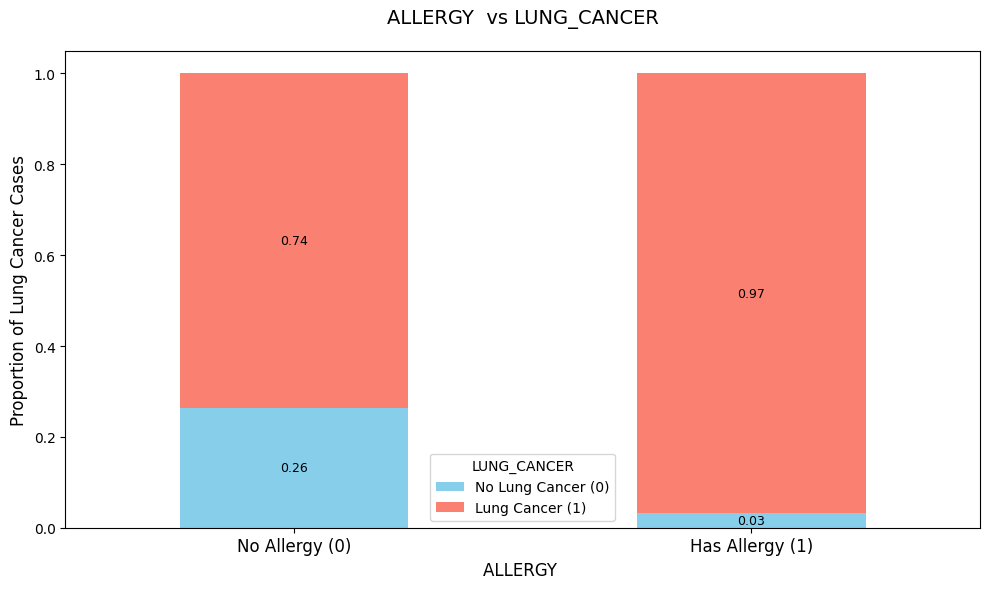

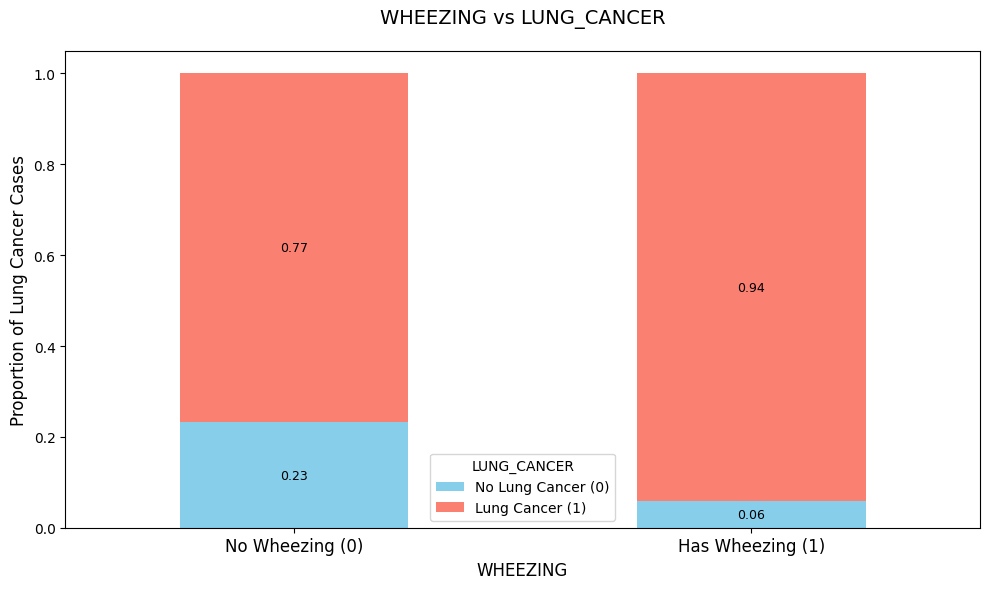

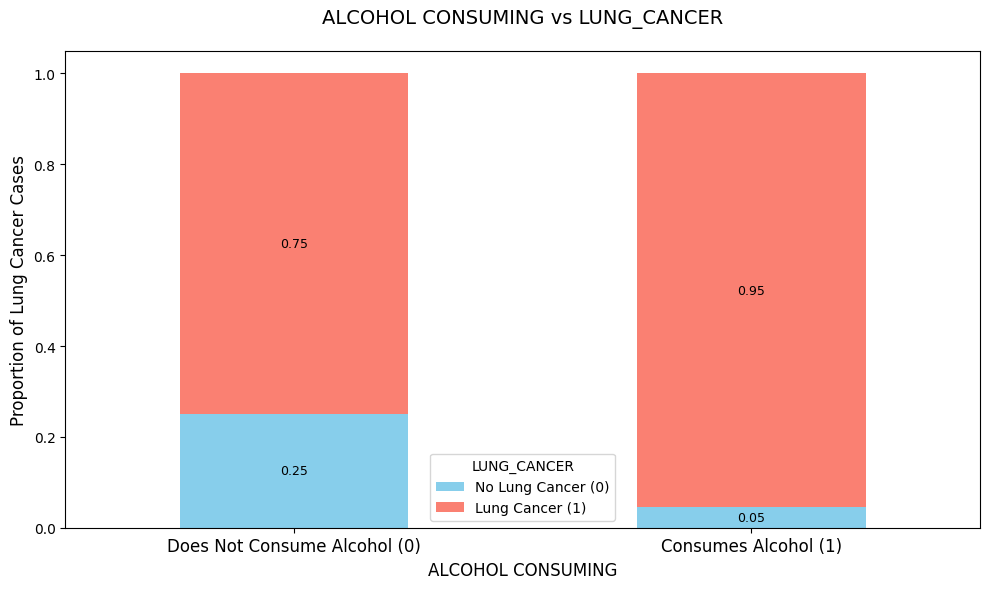

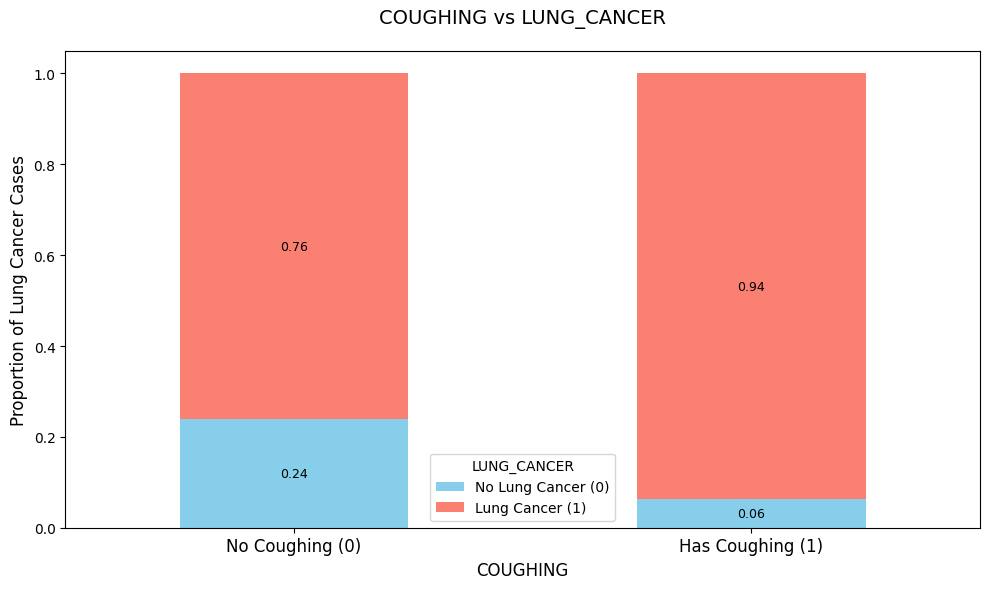

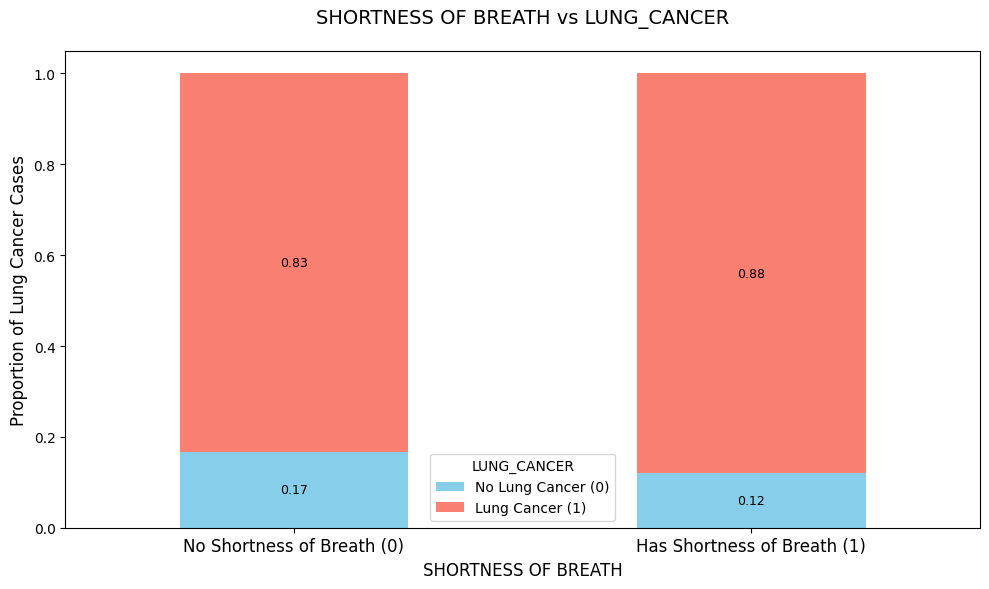

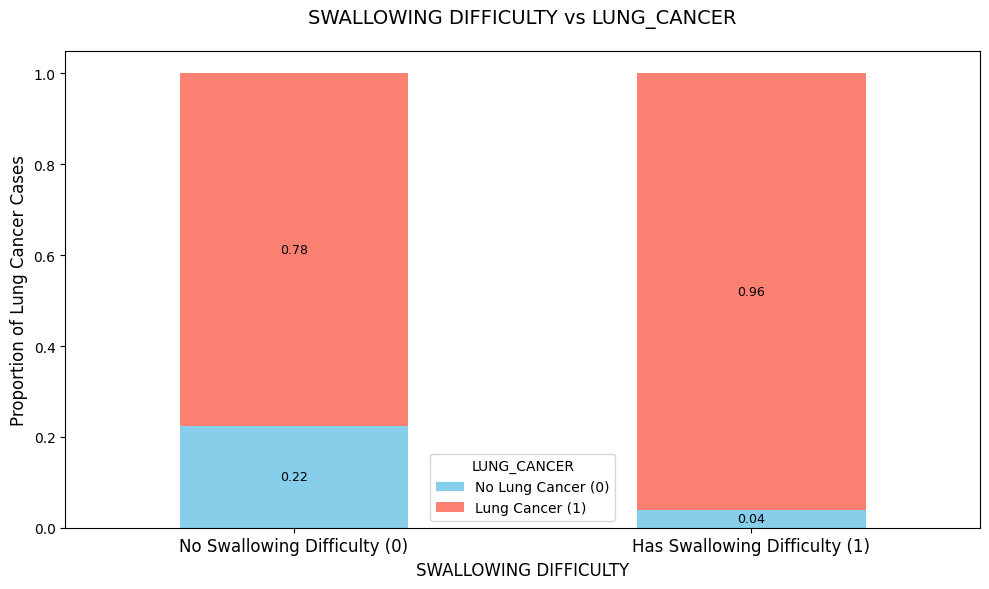

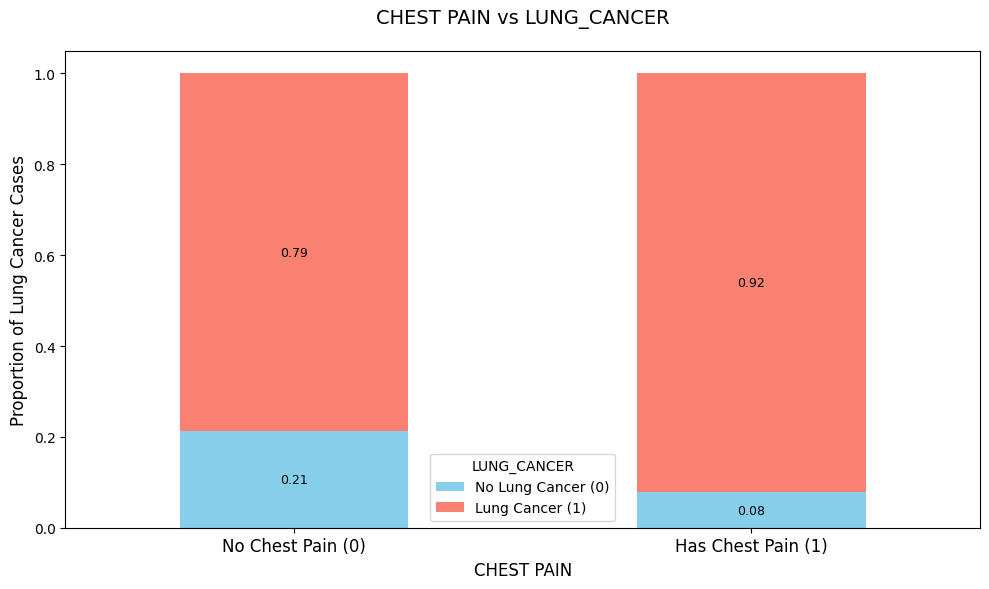

In [ ]:
# Enhanced plotting function with descriptive labels under bars
def enhanced_plot_with_labels(col, df=data, labels=None):
    """
    Enhanced visualization for feature relationships with the target variable,
    with descriptive labels under each bar.
    Args:
        col (str): The name of the column to group by.
        df (pd.DataFrame): The dataset containing the feature and target variable.
        labels (list, optional): A list of descriptive labels for the x-axis categories.
    """
    # Group the data and calculate proportions
    plot_data = df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack()

    # Create the bar plot
    ax = plot_data.plot(
        kind='bar',
        figsize=(10, 6),
        stacked=True,
        color=['skyblue', 'salmon']
    )

    # Add title and labels
    ax.set_title(f'{col} vs LUNG_CANCER', fontsize=14, pad=20)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Proportion of Lung Cancer Cases', fontsize=12)

    # Add legend with clear labels
    ax.legend(
        ['No Lung Cancer (0)', 'Lung Cancer (1)'],
        title='LUNG_CANCER',
        fontsize=10
    )

    # Annotate bars with proportions
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center', fontsize=9)

    # Set descriptive x-axis labels if provided
    if labels:
        ax.set_xticklabels(labels, rotation=0, fontsize=12)

    # Improve layout
    plt.tight_layout()
    plt.show()

# Descriptive labels for features
feature_labels = {
    'GENDER': ['Female (0)', 'Male (1)'],
    'AGE': None,  # Use default labels
    'SMOKING': ['Non-Smoker (0)', 'Smoker (1)'],
    'YELLOW_FINGERS': ['No Yellow Fingers (0)', 'Has Yellow Fingers (1)'],
    'ANXIETY': ['No Anxiety (0)', 'Has Anxiety (1)'],
    'PEER_PRESSURE': ['No Peer Pressure (0)', 'Under Peer Pressure (1)'],
    'CHRONIC DISEASE': ['Has Chronic Disease (1)', 'No Chronic Disease (2)'],
    'FATIGUE ': ['No Fatigue (0)', 'Has Fatigue (1)'],
    'ALLERGY ': ['No Allergy (0)', 'Has Allergy (1)'],
    'WHEEZING': ['No Wheezing (0)', 'Has Wheezing (1)'],
    'ALCOHOL CONSUMING': ['Does Not Consume Alcohol (0)', 'Consumes Alcohol (1)'],
    'COUGHING': ['No Coughing (0)', 'Has Coughing (1)'],
    'SHORTNESS OF BREATH': ['No Shortness of Breath (0)', 'Has Shortness of Breath (1)'],
    'SWALLOWING DIFFICULTY': ['No Swallowing Difficulty (0)', 'Has Swallowing Difficulty (1)'],
    'CHEST PAIN': ['No Chest Pain (0)', 'Has Chest Pain (1)']
}

# Generate improved plots for all features
for feature, labels in feature_labels.items():
    enhanced_plot_with_labels(col=feature, labels=labels)


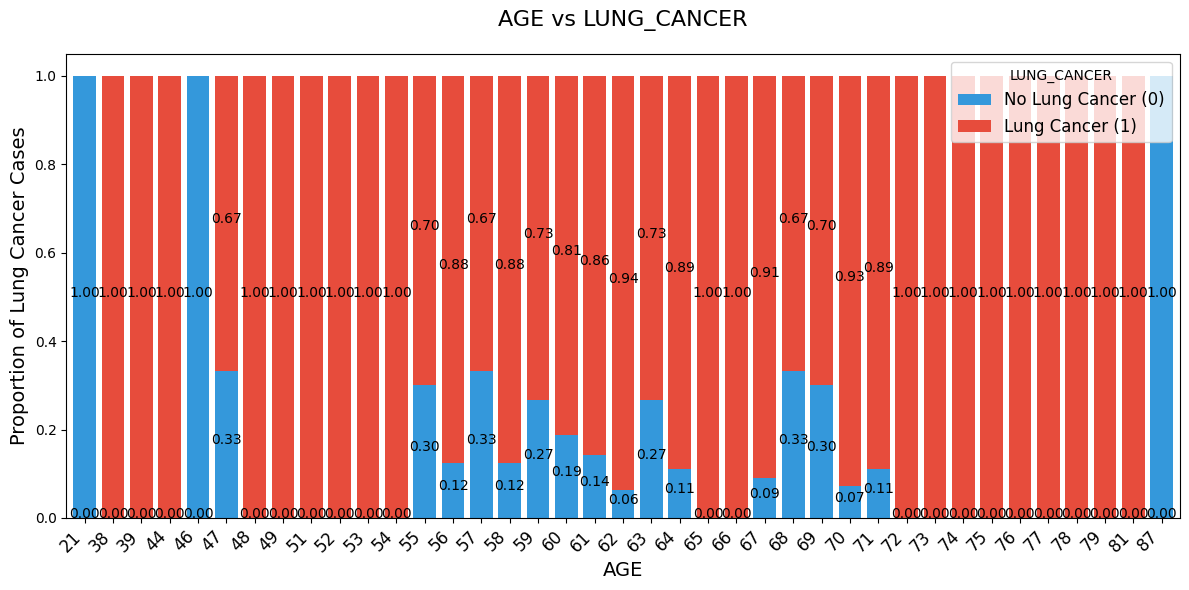

In [ ]:
def improved_plot(col, df=data):
    plot_data = df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack()
    ax = plot_data.plot(
        kind='bar',
        figsize=(12, 6),
        stacked=True,
        width=0.8,
        color=['#3498db', '#e74c3c']
    )
    ax.set_title(f'{col} vs LUNG_CANCER', fontsize=16, pad=20)
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel('Proportion of Lung Cancer Cases', fontsize=14)
    ax.legend(['No Lung Cancer (0)', 'Lung Cancer (1)'], title='LUNG_CANCER', fontsize=12)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center', fontsize=10, padding=3)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.tight_layout()
    plt.show()

improved_plot('AGE')


Correlation Matrix:
                         GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000 -0.013120  0.041131       -0.202506 -0.152032   
AGE                   -0.013120  1.000000 -0.073410        0.025773  0.050605   
SMOKING                0.041131 -0.073410  1.000000       -0.020799  0.153389   
YELLOW_FINGERS        -0.202506  0.025773 -0.020799        1.000000  0.558344   
ANXIETY               -0.152032  0.050605  0.153389        0.558344  1.000000   
PEER_PRESSURE         -0.261427  0.037848 -0.030364        0.313067  0.210278   
CHRONIC DISEASE       -0.189925 -0.003431 -0.149415        0.015316 -0.006938   
FATIGUE               -0.079020  0.021606 -0.037803       -0.099644 -0.181474   
ALLERGY                0.150174  0.037139 -0.030179       -0.147130 -0.159451   
WHEEZING               0.121047  0.052803 -0.147081       -0.058756 -0.174009   
ALCOHOL CONSUMING      0.434264  0.052049 -0.052771       -0.273643 -0.152228   
COUGHING

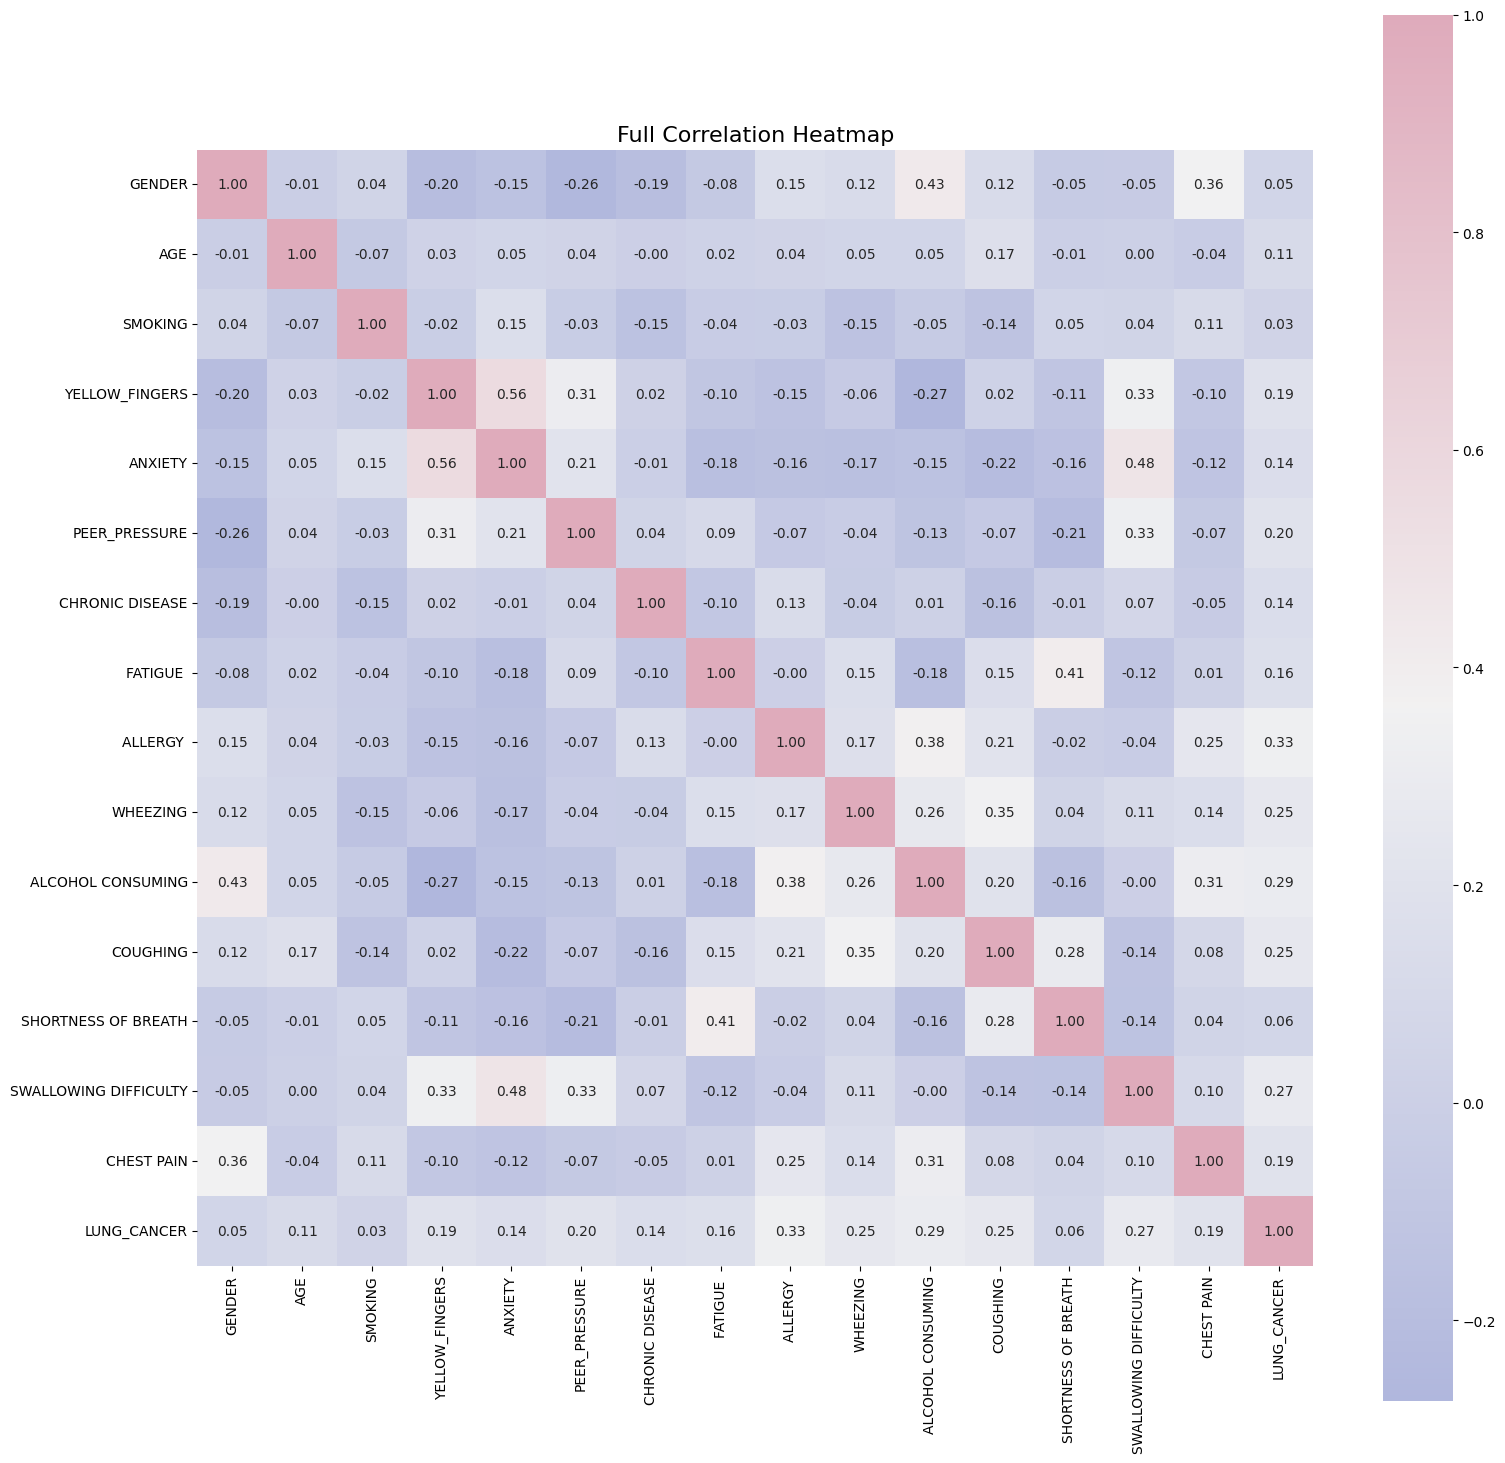


Strong Correlations (>= 0.40 or <= -0.40):
                         GENDER  AGE  SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000  NaN      NaN             NaN       NaN   
AGE                         NaN  1.0      NaN             NaN       NaN   
SMOKING                     NaN  NaN      1.0             NaN       NaN   
YELLOW_FINGERS              NaN  NaN      NaN        1.000000  0.558344   
ANXIETY                     NaN  NaN      NaN        0.558344  1.000000   
PEER_PRESSURE               NaN  NaN      NaN             NaN       NaN   
CHRONIC DISEASE             NaN  NaN      NaN             NaN       NaN   
FATIGUE                     NaN  NaN      NaN             NaN       NaN   
ALLERGY                     NaN  NaN      NaN             NaN       NaN   
WHEEZING                    NaN  NaN      NaN             NaN       NaN   
ALCOHOL CONSUMING      0.434264  NaN      NaN             NaN       NaN   
COUGHING                    NaN  NaN      NaN           

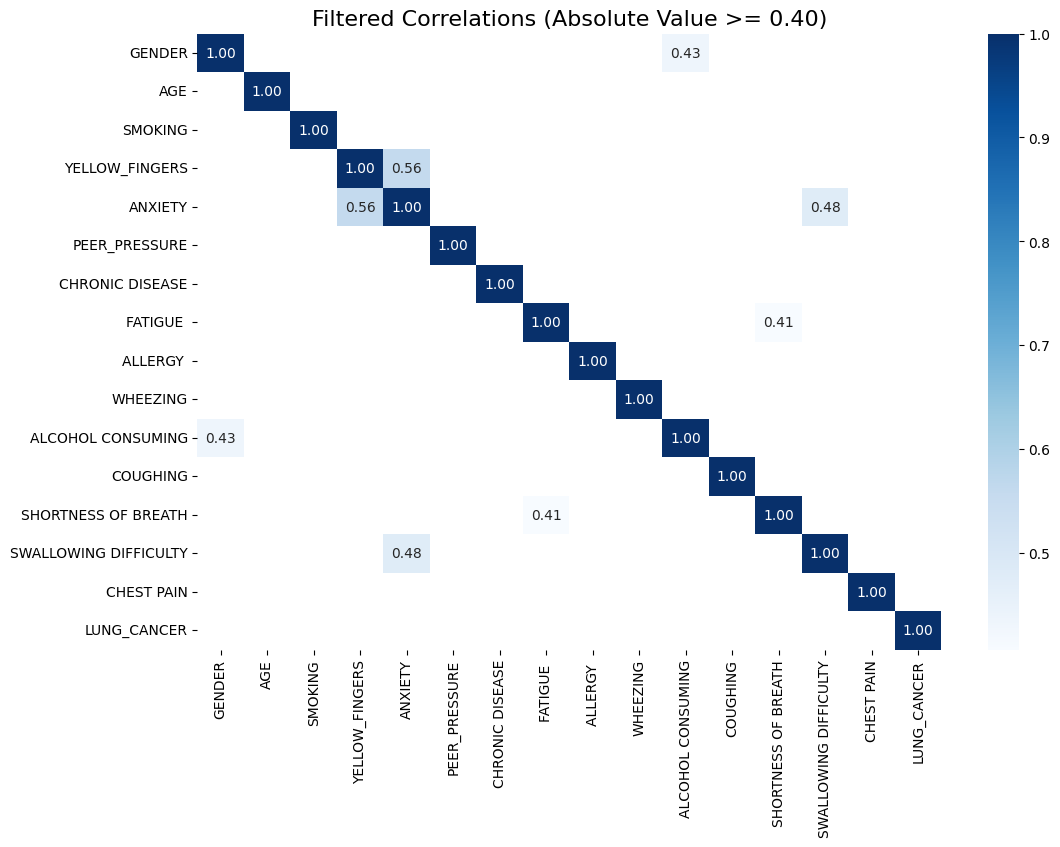

In [ ]:
correlation_matrix = data.corr() # Changed df_new to data

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the full correlation matrix as a heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(
    correlation_matrix,
    cmap=sns.diverging_palette(260, -10, s=50, l=75, n=6, as_cmap=True),
    annot=True,
    square=True,
    fmt=".2f"
)
plt.title("Full Correlation Heatmap", fontsize=16)
plt.show()

# Highlight strong correlations (absolute values >= 0.40)
strong_correlations = correlation_matrix[(correlation_matrix >= 0.40) | (correlation_matrix <= -0.40)]

# Display the filtered correlations for clarity
print("\nStrong Correlations (>= 0.40 or <= -0.40):")
print(strong_correlations)

# Visualize the filtered correlations as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    strong_correlations,
    cmap="Blues",
    annot=True,
    fmt=".2f",
    cbar=True,
    mask=strong_correlations.isnull()  # Mask null values for better visualization
)
plt.title("Filtered Correlations (Absolute Value >= 0.40)", fontsize=16)
plt.show()

### Step 3: Feature Engineering

**Objective:** Refine the dataset by removing weakly correlated features and creating new engineered features that may improve predictive power.

**What we do**
- **Drop irrelevant features** (e.g., `GENDER`, `AGE`, `SMOKING`, `SHORTNESS OF BREATH`) that showed little correlation with `LUNG_CANCER` in the EDA step.  
- **Engineer a new feature** `ANXYELFIN` by combining `ANXIETY` and `YELLOW_FINGERS`, hypothesizing that their interaction could be more predictive than either feature alone.  
- Split the dataset into **independent variables (X)** and the **target variable (y)** to prepare for model training.

**Why it matters**
- Removing weak features can simplify models and reduce noise.  
- Feature engineering introduces new dimensions of information that may capture complex relationships.  
- Preparing X and y is a prerequisite for training machine learning models.

**Key outputs to note**
- Updated dataset shape after dropping features.  
- New column `ANXYELFIN` visible in the dataset preview.  
- Shapes of **X** (features) and **y** (target).


In [ ]:
# Explain the reasoning for dropping features
print("\nDropping Irrelevant Features:")
print("Based on the correlation analysis, the following features are dropped:")

# Features to drop based on correlation analysis:
# - GENDER: Weak correlation with LUNG_CANCER (near zero in the correlation matrix).
# - AGE: Weak correlation with LUNG_CANCER, as shown in visualizations.
# - SMOKING: Weak correlation with LUNG_CANCER; not predictive enough based on analysis.
# - SHORTNESS OF BREATH: Weak correlation with LUNG_CANCER, little predictive impact.

irrelevant_features = ['GENDER', 'AGE', 'SMOKING', 'SHORTNESS OF BREATH']

print("- GENDER: Weak correlation with LUNG_CANCER.")
print("- AGE: Weak correlation with LUNG_CANCER.")
print("- SMOKING: Weak correlation with LUNG_CANCER.")
print("- SHORTNESS OF BREATH: Weak correlation with LUNG_CANCER.")

df_new = data.drop(columns=irrelevant_features)

print(f"\nOriginal Dataset Shape: {data.shape}")
print(f"Updated Dataset Shape after dropping irrelevant features: {df_new.shape}")

print("\nUpdated Dataset Preview:")
print(df_new.head())

print("\nRemaining Features in Updated Dataset:")
print(df_new.columns.tolist())



Dropping Irrelevant Features:
Based on the correlation analysis, the following features are dropped:
- GENDER: Weak correlation with LUNG_CANCER.
- AGE: Weak correlation with LUNG_CANCER.
- SMOKING: Weak correlation with LUNG_CANCER.
- SHORTNESS OF BREATH: Weak correlation with LUNG_CANCER.

Original Dataset Shape: (276, 16)
Updated Dataset Shape after dropping irrelevant features: (276, 12)

Updated Dataset Preview:
   YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   \
0               1        1              0                0         1   
1               0        0              0                1         1   
2               0        0              1                0         1   
3               1        1              0                0         0   
4               1        0              0                0         0   

   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  SWALLOWING DIFFICULTY  \
0         0         1                  1         1                  

In [ ]:
# Feature Engineering: Combine 'ANXIETY' and 'YELLOW_FINGERS' into a new feature
print("Creating a new feature 'ANXYELFIN' by combining 'ANXIETY' and 'YELLOW_FINGERS'...")
df_new['ANXYELFIN'] = df_new['ANXIETY'] * df_new['YELLOW_FINGERS']

# Display the first few rows to verify the new feature
print("\nDataset after adding the new feature 'ANXYELFIN':")
print(df_new.head())

# Splitting independent and dependent variables
print("\nSplitting dataset into independent (X) and dependent (y) variables...")
X = df_new.drop('LUNG_CANCER', axis=1)
y = df_new['LUNG_CANCER']

# Display shapes of X and y
print(f"\nShape of Independent Features (X): {X.shape}")
print(f"Shape of Target Variable (y): {y.shape}")


Creating a new feature 'ANXYELFIN' by combining 'ANXIETY' and 'YELLOW_FINGERS'...

Dataset after adding the new feature 'ANXYELFIN':
   YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   \
0               1        1              0                0         1   
1               0        0              0                1         1   
2               0        0              1                0         1   
3               1        1              0                0         0   
4               1        0              0                0         0   

   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  SWALLOWING DIFFICULTY  \
0         0         1                  1         1                      1   
1         1         0                  0         0                      1   
2         0         1                  0         1                      0   
3         0         0                  1         0                      1   
4         0         1                  0         

### Step 4: Handling Class Imbalance (ADASYN)

**Objective:** Balance the dataset to ensure fair training and avoid bias toward the majority class.

**What we do**
- Apply **ADASYN (Adaptive Synthetic Sampling)** to generate synthetic samples for the minority class (`LUNG_CANCER = 1`).  
- Rebalance the dataset so both classes (Cancer vs. No Cancer) are more evenly represented.  
- Verify the new distribution of the target variable after resampling.

**Why it matters**
- Class imbalance is common in medical datasets and can lead to models that predict only the majority class.  
- By oversampling the minority class, we ensure the model learns to recognize positive cancer cases, which is critical in healthcare predictions.  

**Key outputs to note**
- Shapes of the resampled **X** (features) and **y** (target).  
- **Balanced distribution** of target classes after ADASYN.


In [ ]:
# Handle Target Imbalance Using ADASYN
from imblearn.over_sampling import ADASYN

# Initialize ADASYN
print("\nHandling target imbalance using ADASYN...")
adasyn = ADASYN(random_state=42)

# Fit and resample the dataset
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Display the new shape of the resampled dataset
print(f"Shape of Resampled Independent Features (X): {X_resampled.shape}")
print(f"Shape of Resampled Target Variable (y): {y_resampled.shape}")

# Check the new distribution of the target variable
print("\nNew Target Distribution After Resampling:")
print(y_resampled.value_counts())



Handling target imbalance using ADASYN...
Shape of Resampled Independent Features (X): (477, 12)
Shape of Resampled Target Variable (y): (477,)

New Target Distribution After Resampling:
LUNG_CANCER
0    239
1    238
Name: count, dtype: int64


### Step 5: Train/Test Split

**Objective:** Divide the balanced dataset into training and testing sets to evaluate model performance on unseen data.

**What we do**
- Use an **80/20 split**: 80% of the data for training, 20% for testing.  
- Ensure reproducibility with a fixed `random_state`.  
- Separate both the features (**X**) and labels (**y**) into training and testing subsets.

**Why it matters**
- Training data is used to fit the machine learning models.  
- Testing data provides an unbiased evaluation of model generalization.  
- Without a proper split, models risk overfitting and producing inflated accuracy.

**Key outputs to note**
- Shapes of `X_train`, `X_test`, `y_train`, and `y_test` confirming the split ratio.  


In [ ]:
from sklearn.model_selection import train_test_split

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Display the shapes of the splits
print(f"Training Data Shape (X_train): {X_train.shape}")
print(f"Testing Data Shape (X_test): {X_test.shape}")
print(f"Training Labels Shape (y_train): {y_train.shape}")
print(f"Testing Labels Shape (y_test): {y_test.shape}")


Training Data Shape (X_train): (381, 12)
Testing Data Shape (X_test): (96, 12)
Training Labels Shape (y_train): (381,)
Testing Labels Shape (y_test): (96,)


### Step 6: Model Training & Evaluation

**Objective:** Train multiple machine learning models and evaluate their performance on the test set.

**What we do**
- Train four supervised learning algorithms:  
  - **Support Vector Machine (SVM)**  
  - **K-Nearest Neighbors (KNN)**  
  - **Decision Tree**  
  - **Logistic Regression**  
- Generate predictions on the test data.  
- Evaluate models using:  
  - **Classification Report** (precision, recall, F1-score)  
  - **Accuracy Score**  
  - **Confusion Matrix** for error analysis  

**Why it matters**
- Different algorithms have different strengths; comparing them ensures we choose the most reliable model.  
- Precision and recall are especially important in healthcare, where false negatives (missed cancer cases) can be critical.  
- The confusion matrix highlights how well the model distinguishes between cancer and no-cancer cases.

**Key outputs to note**
- Accuracy values for all four models.  
- Classification reports summarizing precision, recall, and F1-score.  
- Confusion matrices visualizing true vs. false predictions.



Training SVM...

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.93      0.95      0.94        44

    accuracy                           0.95        96
   macro avg       0.95      0.95      0.95        96
weighted avg       0.95      0.95      0.95        96


SVM Accuracy: 0.95


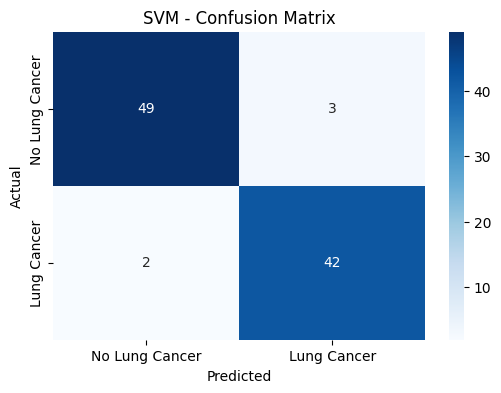


Training KNN...

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        52
           1       1.00      0.91      0.95        44

    accuracy                           0.96        96
   macro avg       0.96      0.95      0.96        96
weighted avg       0.96      0.96      0.96        96


KNN Accuracy: 0.96


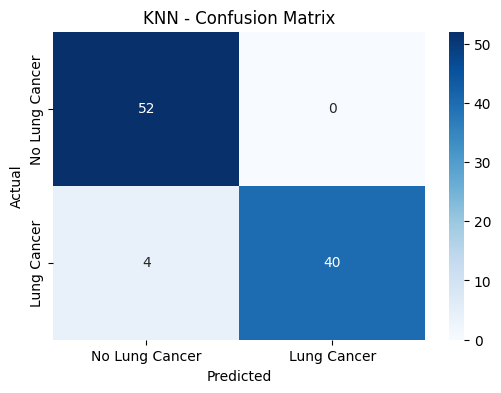


Training Decision Tree...

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.98      0.95      0.97        44

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96


Decision Tree Accuracy: 0.97


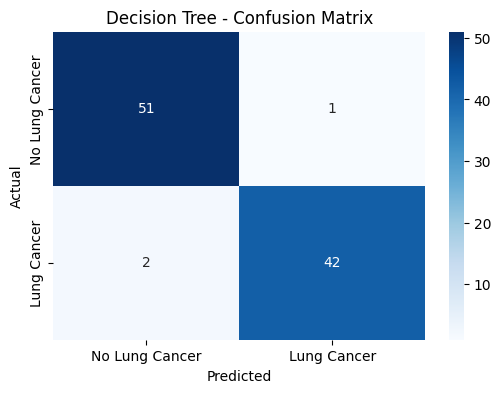


Training Logistic Regression...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        52
           1       0.89      0.93      0.91        44

    accuracy                           0.92        96
   macro avg       0.92      0.92      0.92        96
weighted avg       0.92      0.92      0.92        96


Logistic Regression Accuracy: 0.92


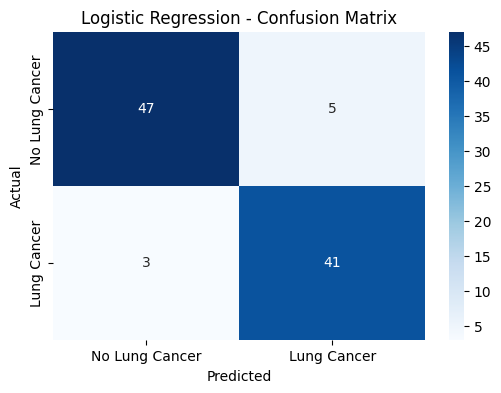

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Dictionary of models to train
models = {
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Train and evaluate each model
model_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Predict the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {accuracy:.2f}")

    # Store results
    model_results[name] = {
        "Model": model,
        "Accuracy": accuracy,
        "Confusion Matrix": cm
    }

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Lung Cancer", "Lung Cancer"], yticklabels=["No Lung Cancer", "Lung Cancer"])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


### Step 7: Cross-Validation & Model Comparison

**Objective:** Validate the stability and robustness of each model using k-fold cross-validation and compare their performance.

**What we do**
- Apply **10-fold cross-validation** to each trained model.  
- Calculate the **mean accuracy** and **standard deviation** across folds.  
- Identify the **best-performing model** based on highest mean accuracy.  
- Visualize model performance with a bar chart, highlighting the strongest candidate.

**Why it matters**
- A single train/test split may give biased results depending on how data is divided.  
- Cross-validation provides a more reliable estimate of model performance.  
- Comparing models ensures we select the one that generalizes best to unseen data.

**Key outputs to note**
- Mean accuracy and standard deviation for each model.  
- Highlighted bar plot showing the top-performing model.  
- Clear identification of the **best model** (expected: SVM with highest accuracy).


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np


# Apply K-Fold Cross Validation
print("\nCross-Validation Scores:")
cv_results = {}
best_model_name = None
best_mean_score = 0

for name, result in model_results.items():
    model = result["Model"]
    scores = cross_val_score(model, X_resampled, y_resampled, cv=10, scoring='accuracy')
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    cv_results[name] = {"Mean Accuracy": mean_score, "Std Dev": std_score}

    print(f"{name}: Mean Accuracy = {mean_score:.2f}, Std Dev = {std_score:.2f}")

    # Identify the best model
    if mean_score > best_mean_score:
        best_mean_score = mean_score
        best_model_name = name

# Print the best model
print(f"\nThe best model is: {best_model_name} with Mean Accuracy = {best_mean_score:.2f}")



Cross-Validation Scores:
SVM: Mean Accuracy = 0.95, Std Dev = 0.03
KNN: Mean Accuracy = 0.92, Std Dev = 0.05
Decision Tree: Mean Accuracy = 0.94, Std Dev = 0.05
Logistic Regression: Mean Accuracy = 0.93, Std Dev = 0.04

The best model is: SVM with Mean Accuracy = 0.95


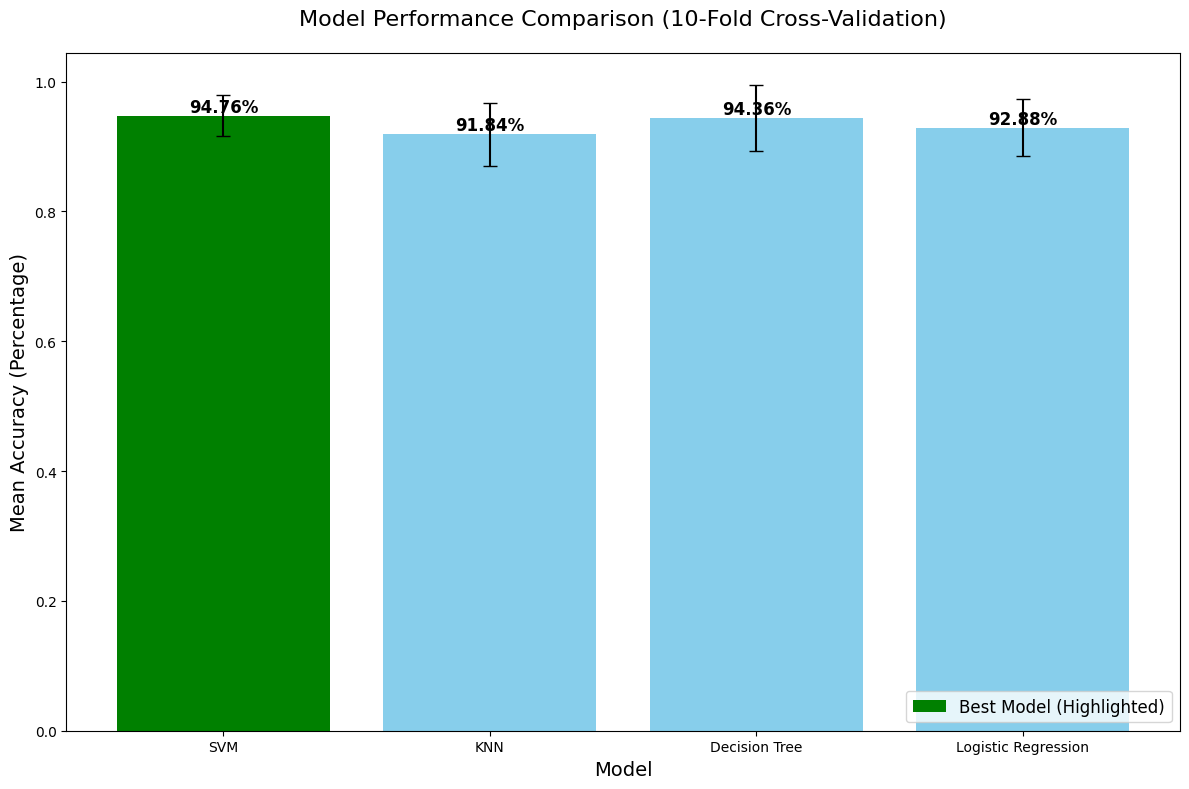

In [ ]:
# Visualize Model Performance with Improved Labels and Highlights
model_names = list(cv_results.keys())
mean_accuracies = [cv_results[name]["Mean Accuracy"] for name in model_names]
std_devs = [cv_results[name]["Std Dev"] for name in model_names]

plt.figure(figsize=(12, 8))

# Bar colors: Highlight the best model
bar_colors = ['green' if name == best_model_name else 'skyblue' for name in model_names]

# Create the bar plot
bars = plt.bar(model_names, mean_accuracies, yerr=std_devs, color=bar_colors, capsize=5)

# Add percentages as labels on the bars
for bar, mean_accuracy in zip(bars, mean_accuracies):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{mean_accuracy:.2%}",  # Convert to percentage
        ha='center', va='bottom', fontsize=12, fontweight='bold'
    )

# Add title and axis labels
plt.title("Model Performance Comparison (10-Fold Cross-Validation)", fontsize=16, pad=20)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Mean Accuracy (Percentage)", fontsize=14)

# Add legend
plt.legend(["Best Model (Highlighted)", "Other Models"], loc="lower right", fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()


### Step 8: Save & Reload Best Model

**Objective:** Persist the best-performing model to disk and verify it can be reloaded for inference.

**What we do**
- Identify the **best model** from cross-validation results.
- **Save** the trained model to disk using `joblib` (fast, robust for scikit-learn objects).

**Why it matters**
- Model persistence enables **deployment** (e.g., in a REST API or Streamlit app) without retraining.
- Reloading verifies that the saved artifact is **portable and reliable** across sessions/environments.

**Key outputs to note**
- A serialized file (e.g., `best_model.pkl`) in the repository.
- Matching predictions from the **reloaded** model vs. the one in memory on the same inputs.


In [ ]:
import joblib

# Identify the best model
best_model_name = max(cv_results, key=lambda x: cv_results[x]["Mean Accuracy"])
best_model = model_results[best_model_name]["Model"]

print(f"\nBest Model: {best_model_name} with Mean Accuracy = {cv_results[best_model_name]['Mean Accuracy']:.2f}")

# Save the best model to a file
joblib.dump(best_model, "best_model.pkl")
print("Best model saved as 'best_model.pkl'")



Best Model: SVM with Mean Accuracy = 0.95
Best model saved as 'best_model.pkl'


### Step 9: Final Evaluation & Sample Predictions

**Objective:** Evaluate the reloaded best model on the held-out test set and sanity-check its behavior with example predictions.

**What we do**
- **Load** the persisted model artifact (`best_model.pkl`) using `joblib`.
- **Predict** on the entire test set to assess generalization.
- Report **classification metrics**: accuracy, precision, recall, F1 (via `classification_report`).
- Visualize a **confusion matrix** to understand error types (false positives/negatives).
- Print **example row predictions** alongside ground truth for human-readable verification.

**Why it matters**
- Confirms that the saved model can be reliably **reused** across sessions (reproducibility).
- Metrics and the confusion matrix reveal where the model succeeds or struggles.
- Example predictions provide an intuitive check that complements aggregate metrics.

**Key outputs to note**
- **Accuracy** on the test split.
- Full **classification report** (precision, recall, F1 for each class).
- **Confusion matrix** heatmap.
- A small table/log of **example predictions** vs. actual labels to spot obvious mismatches.



Loading the saved best model...
Model loaded successfully!

Testing the model on the full test dataset...

Model Evaluation Metrics:
Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.93      0.95      0.94        44

    accuracy                           0.95        96
   macro avg       0.95      0.95      0.95        96
weighted avg       0.95      0.95      0.95        96


Visualizing Confusion Matrix...


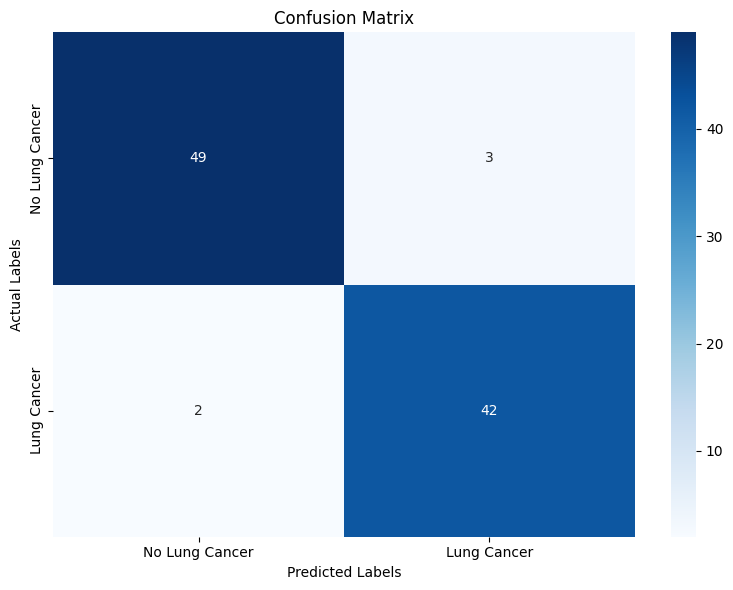


Example Predictions on Individual Rows (with Cancer Status and Feature Values):
Example 1:
Input Features and Values:
  YELLOW_FINGERS: Y
  ANXIETY: E
  PEER_PRESSURE: L
  CHRONIC DISEASE: L
  FATIGUE : O
  ALLERGY : W
  WHEEZING: _
  ALCOHOL CONSUMING: F
  COUGHING: I
  SWALLOWING DIFFICULTY: N
  CHEST PAIN: G
  ANXYELFIN: E
Predicted: No Cancer
Actual: No Cancer

Example 2:
Input Features and Values:
  YELLOW_FINGERS: A
  ANXIETY: N
  PEER_PRESSURE: X
  CHRONIC DISEASE: I
  FATIGUE : E
  ALLERGY : T
  WHEEZING: Y
Predicted: Has Cancer
Actual: Has Cancer

Example 3:
Input Features and Values:
  YELLOW_FINGERS: P
  ANXIETY: E
  PEER_PRESSURE: E
  CHRONIC DISEASE: R
  FATIGUE : _
  ALLERGY : P
  WHEEZING: R
  ALCOHOL CONSUMING: E
  COUGHING: S
  SWALLOWING DIFFICULTY: S
  CHEST PAIN: U
  ANXYELFIN: R
Predicted: Has Cancer
Actual: Has Cancer

Example 4:
Input Features and Values:
  YELLOW_FINGERS: C
  ANXIETY: H
  PEER_PRESSURE: R
  CHRONIC DISEASE: O
  FATIGUE : N
  ALLERGY : I
  WHEEZ

In [ ]:

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Step 1: Load the saved model
print("\nLoading the saved best model...")
loaded_model = joblib.load("best_model.pkl")
print("Model loaded successfully!")

# Step 2: Test the model on a larger dataset (entire test set)
print("\nTesting the model on the full test dataset...")
y_pred = loaded_model.predict(X_test)

# Step 3: Evaluate the model
print("\nModel Evaluation Metrics:")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 4: Confusion Matrix Visualization
print("\nVisualizing Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Lung Cancer", "Lung Cancer"], yticklabels=["No Lung Cancer", "Lung Cancer"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.tight_layout()
plt.show()

# Step 5: Test predictions on example rows
print("\nExample Predictions on Individual Rows (with Cancer Status and Feature Values):")

# Select the first 10 rows from X_test and their corresponding actual labels
example_data = X_test[:10]
example_predictions = loaded_model.predict(example_data)
example_features = X_test[:10]

# Iterate through each row and display feature names and values
for i, (features, prediction, actual) in enumerate(zip(example_features, example_predictions, y_test[:10])):
    # Convert numerical predictions to human-readable labels
    cancer_status_pred = "Has Cancer" if prediction == 1 else "No Cancer"
    cancer_status_actual = "Has Cancer" if actual == 1 else "No Cancer"

    print(f"Example {i + 1}:")
    print("Input Features and Values:")

    # Match feature names with their values for better readability
    for feature_name, value in zip(X_test.columns, features):
        print(f"  {feature_name}: {value}")

    print(f"Predicted: {cancer_status_pred}")
    print(f"Actual: {cancer_status_actual}\n")

#Test predictions on example rows
print("\nExample Predictions on Individual Rows:")
example_data = X_test[:10]  # Test on 10 rows
example_predictions = loaded_model.predict(example_data)

for i, (features, prediction, actual) in enumerate(zip(example_data, example_predictions, y_test[:10])):
    print(f"Example {i + 1}:")
    print(f"Input Features: {features}")
    print(f"Predicted: {prediction}, Actual: {actual}\n")
